In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [137]:
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")
df_customers = pd.read_csv("customers.csv")

In [138]:
df_loans.shape,df_bureau.shape,df_customers.shape

((50000, 15), (50000, 8), (50000, 12))

In [139]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [140]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [141]:
df = pd.merge(df_loans,df_customers , on = "cust_id")

In [142]:
df.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,...,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,...,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,...,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,...,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,...,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [143]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [144]:
df = pd.merge(df,df_bureau,on = "cust_id")

In [145]:
df.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,...,Delhi,Delhi,110001,1,1,42,0,0,3,7
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,...,Chennai,Tamil Nadu,600001,3,1,96,12,60,5,4
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,...,Kolkata,West Bengal,700001,2,1,82,24,147,6,58
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,...,Bangalore,Karnataka,560001,3,0,115,15,87,5,26
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,...,Pune,Maharashtra,411001,4,2,120,0,0,5,10


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      50000 non-null  object 
 1   cust_id                      50000 non-null  object 
 2   loan_purpose                 50000 non-null  object 
 3   loan_type                    50000 non-null  object 
 4   sanction_amount              50000 non-null  int64  
 5   loan_amount                  50000 non-null  int64  
 6   processing_fee               50000 non-null  float64
 7   gst                          50000 non-null  int64  
 8   net_disbursement             50000 non-null  int64  
 9   loan_tenure_months           50000 non-null  int64  
 10  principal_outstanding        50000 non-null  int64  
 11  bank_balance_at_application  50000 non-null  int64  
 12  disbursal_date               50000 non-null  object 
 13  installment_star

In [147]:
df["default"].head()

0    False
1    False
2    False
3    False
4    False
Name: default, dtype: bool

In [148]:
df["default"] = df["default"].astype("int64")

In [149]:
df["default"].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [150]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

*The default column has value inbalence*

In [151]:
X = df.drop("default",axis = 1)
Y = df["default"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [152]:
df_train = pd.concat([X_train,Y_train],axis = "columns")
df_test = pd.concat([X_test,Y_test] , axis = "columns")

In [153]:
df_train.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,L27435,C27435,Home,Secured,3458000,3276000,65520.0,589680,2620800,24,...,Gujarat,380001,4,2,90,6,33,8,59,0
13400,L13401,C13401,Auto,Secured,3103000,2540000,50800.0,457200,2032000,33,...,Delhi,110001,3,1,119,4,17,4,92,0
883,L00884,C00884,Personal,Unsecured,2288000,1920000,38400.0,345600,1536000,19,...,Uttar Pradesh,226001,2,1,83,14,78,4,83,0
7303,L07304,C07304,Auto,Secured,307000,298000,5960.0,53640,238400,21,...,Karnataka,560001,1,1,37,0,0,5,34,0
45124,L45125,C45125,Education,Secured,283000,260000,5200.0,46800,208000,45,...,Rajasthan,302001,2,0,62,6,28,5,19,0


In [154]:
df_test.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
33553,L33554,C33554,Education,Secured,6260000,4714000,94280.0,848520,3771200,34,...,Telangana,500001,2,2,70,3,27,5,12,0
9427,L09428,C09428,Home,Secured,10649000,8830000,176600.0,1589400,7064000,39,...,Rajasthan,302001,4,0,115,0,0,9,85,0
199,L00200,C00200,Home,Secured,3813000,3229000,64580.0,581220,2583200,39,...,Delhi,110001,4,1,144,0,0,4,72,0
12447,L12448,C12448,Auto,Secured,1697000,1300000,26000.0,234000,1040000,16,...,Delhi,110001,3,2,93,0,0,4,90,0
39489,L39490,C39490,Auto,Secured,2385000,2118000,42360.0,381240,1694400,26,...,Maharashtra,411001,4,2,152,20,105,9,53,0


In [155]:
df_test.shape,df_train.shape

((12500, 33), (37500, 33))

# Data Cleaning

In [156]:
df_train.isna().sum()

loan_id                         0
cust_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [157]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [158]:
residence_type_mode = df_train["residence_type"].mode()[0]

In [159]:
df_train.residence_type.fillna(residence_type_mode,inplace = True)

In [160]:
df_train.isna().sum()

loan_id                        0
cust_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [161]:
df_test.residence_type.fillna(residence_type_mode,inplace = True)

In [162]:
df_test.isna().sum()

loan_id                        0
cust_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [163]:
df_train.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [164]:
continious_columns = ['sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 
       'age', 'income','number_of_dependants','years_at_current_address','number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

categorical_columns = ['loan_purpose', 'loan_type','gender', 'marital_status', 'employment_status','residence_type','city', 'state', 'zipcode','default']

In [165]:
df_train[categorical_columns].head()

,loan_purpose,loan_type,gender,marital_status,employment_status,residence_type,city,state,zipcode,default
27434,Home,Secured,F,Single,Salaried,Owned,Ahmedabad,Gujarat,380001,0
13400,Auto,Secured,M,Single,Salaried,Owned,Delhi,Delhi,110001,0
883,Personal,Unsecured,F,Single,Self-Employed,Mortgage,Lucknow,Uttar Pradesh,226001,0
7303,Auto,Secured,F,Single,Self-Employed,Owned,Bangalore,Karnataka,560001,0
45124,Education,Secured,F,Single,Salaried,Owned,Jaipur,Rajasthan,302001,0


In [166]:
for col in categorical_columns:
    print(col, "--->",df_train[col].unique())

loan_purpose ---> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type ---> ['Secured' 'Unsecured']
gender ---> ['F' 'M']
marital_status ---> ['Single' 'Married']
employment_status ---> ['Salaried' 'Self-Employed']
residence_type ---> ['Owned' 'Mortgage' 'Rented']
city ---> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state ---> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode ---> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
default ---> [0 1]


In [167]:
df_train["loan_purpose"].replace({"Personaal": "Personal"}, inplace=True)

In [168]:
for col in categorical_columns:
    print(col, "--->",df_train[col].unique())

loan_purpose ---> ['Home' 'Auto' 'Personal' 'Education']
loan_type ---> ['Secured' 'Unsecured']
gender ---> ['F' 'M']
marital_status ---> ['Single' 'Married']
employment_status ---> ['Salaried' 'Self-Employed']
residence_type ---> ['Owned' 'Mortgage' 'Rented']
city ---> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state ---> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode ---> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
default ---> [0 1]


In [169]:
df_test["loan_purpose"].replace({"Personaal": "Personal"}, inplace=True)

In [170]:
for col in categorical_columns:
    print(col, "--->",df_test[col].unique())

loan_purpose ---> ['Education' 'Home' 'Auto' 'Personal']
loan_type ---> ['Secured' 'Unsecured']
gender ---> ['F' 'M']
marital_status ---> ['Married' 'Single']
employment_status ---> ['Self-Employed' 'Salaried']
residence_type ---> ['Owned' 'Rented' 'Mortgage']
city ---> ['Hyderabad' 'Jaipur' 'Delhi' 'Pune' 'Chennai' 'Ahmedabad' 'Lucknow'
 'Kolkata' 'Bangalore' 'Mumbai']
state ---> ['Telangana' 'Rajasthan' 'Delhi' 'Maharashtra' 'Tamil Nadu' 'Gujarat'
 'Uttar Pradesh' 'West Bengal' 'Karnataka']
zipcode ---> [500001 302001 110001 411001 600001 380001 226001 700001 560001 400001]
default ---> [0 1]


In [171]:
df_test[continious_columns].head()

,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,income,number_of_dependants,years_at_current_address,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
33553,6260000,4714000,94280.0,848520,3771200,34,1541773,1788591,36,3373000,3,15,2,2,70,3,27,5,12
9427,10649000,8830000,176600.0,1589400,7064000,39,1355455,810309,33,2725000,0,15,4,0,115,0,0,9,85
199,3813000,3229000,64580.0,581220,2583200,39,538593,332456,28,1071000,0,19,4,1,144,0,0,4,72
12447,1697000,1300000,26000.0,234000,1040000,16,621313,346879,28,1183000,3,4,3,2,93,0,0,4,90
39489,2385000,2118000,42360.0,381240,1694400,26,1490698,497720,52,2079000,2,26,4,2,152,20,105,9,53


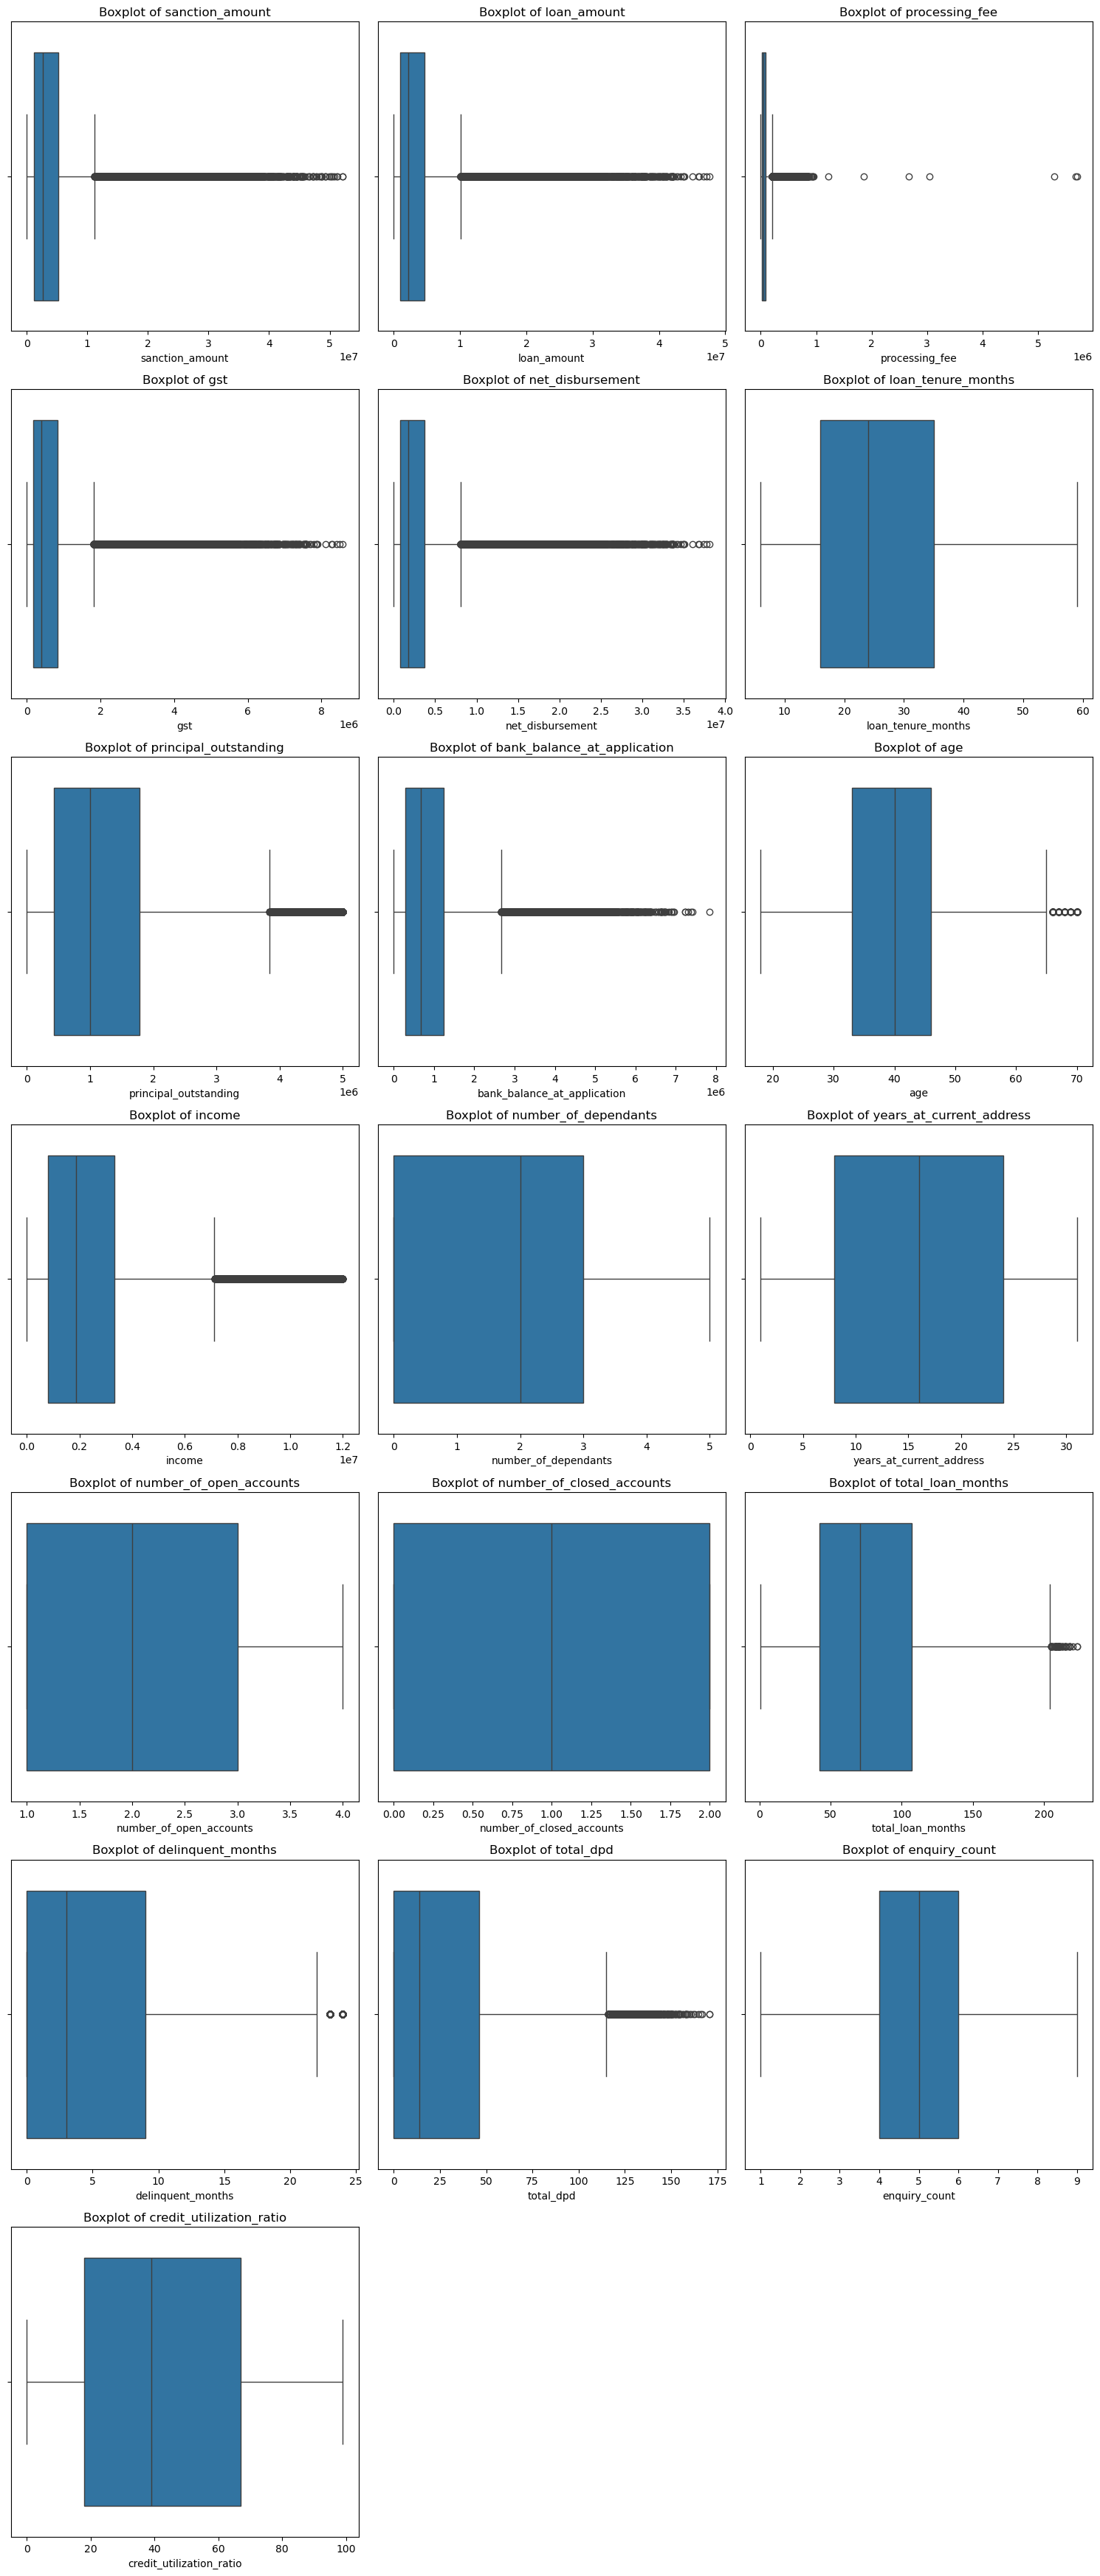

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define layout: adjust rows and columns based on how many plots you have
cols = 3
rows = (len(continious_columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Flatten the grid for easy looping

for i, col in enumerate(continious_columns):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots if columns < rows*cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

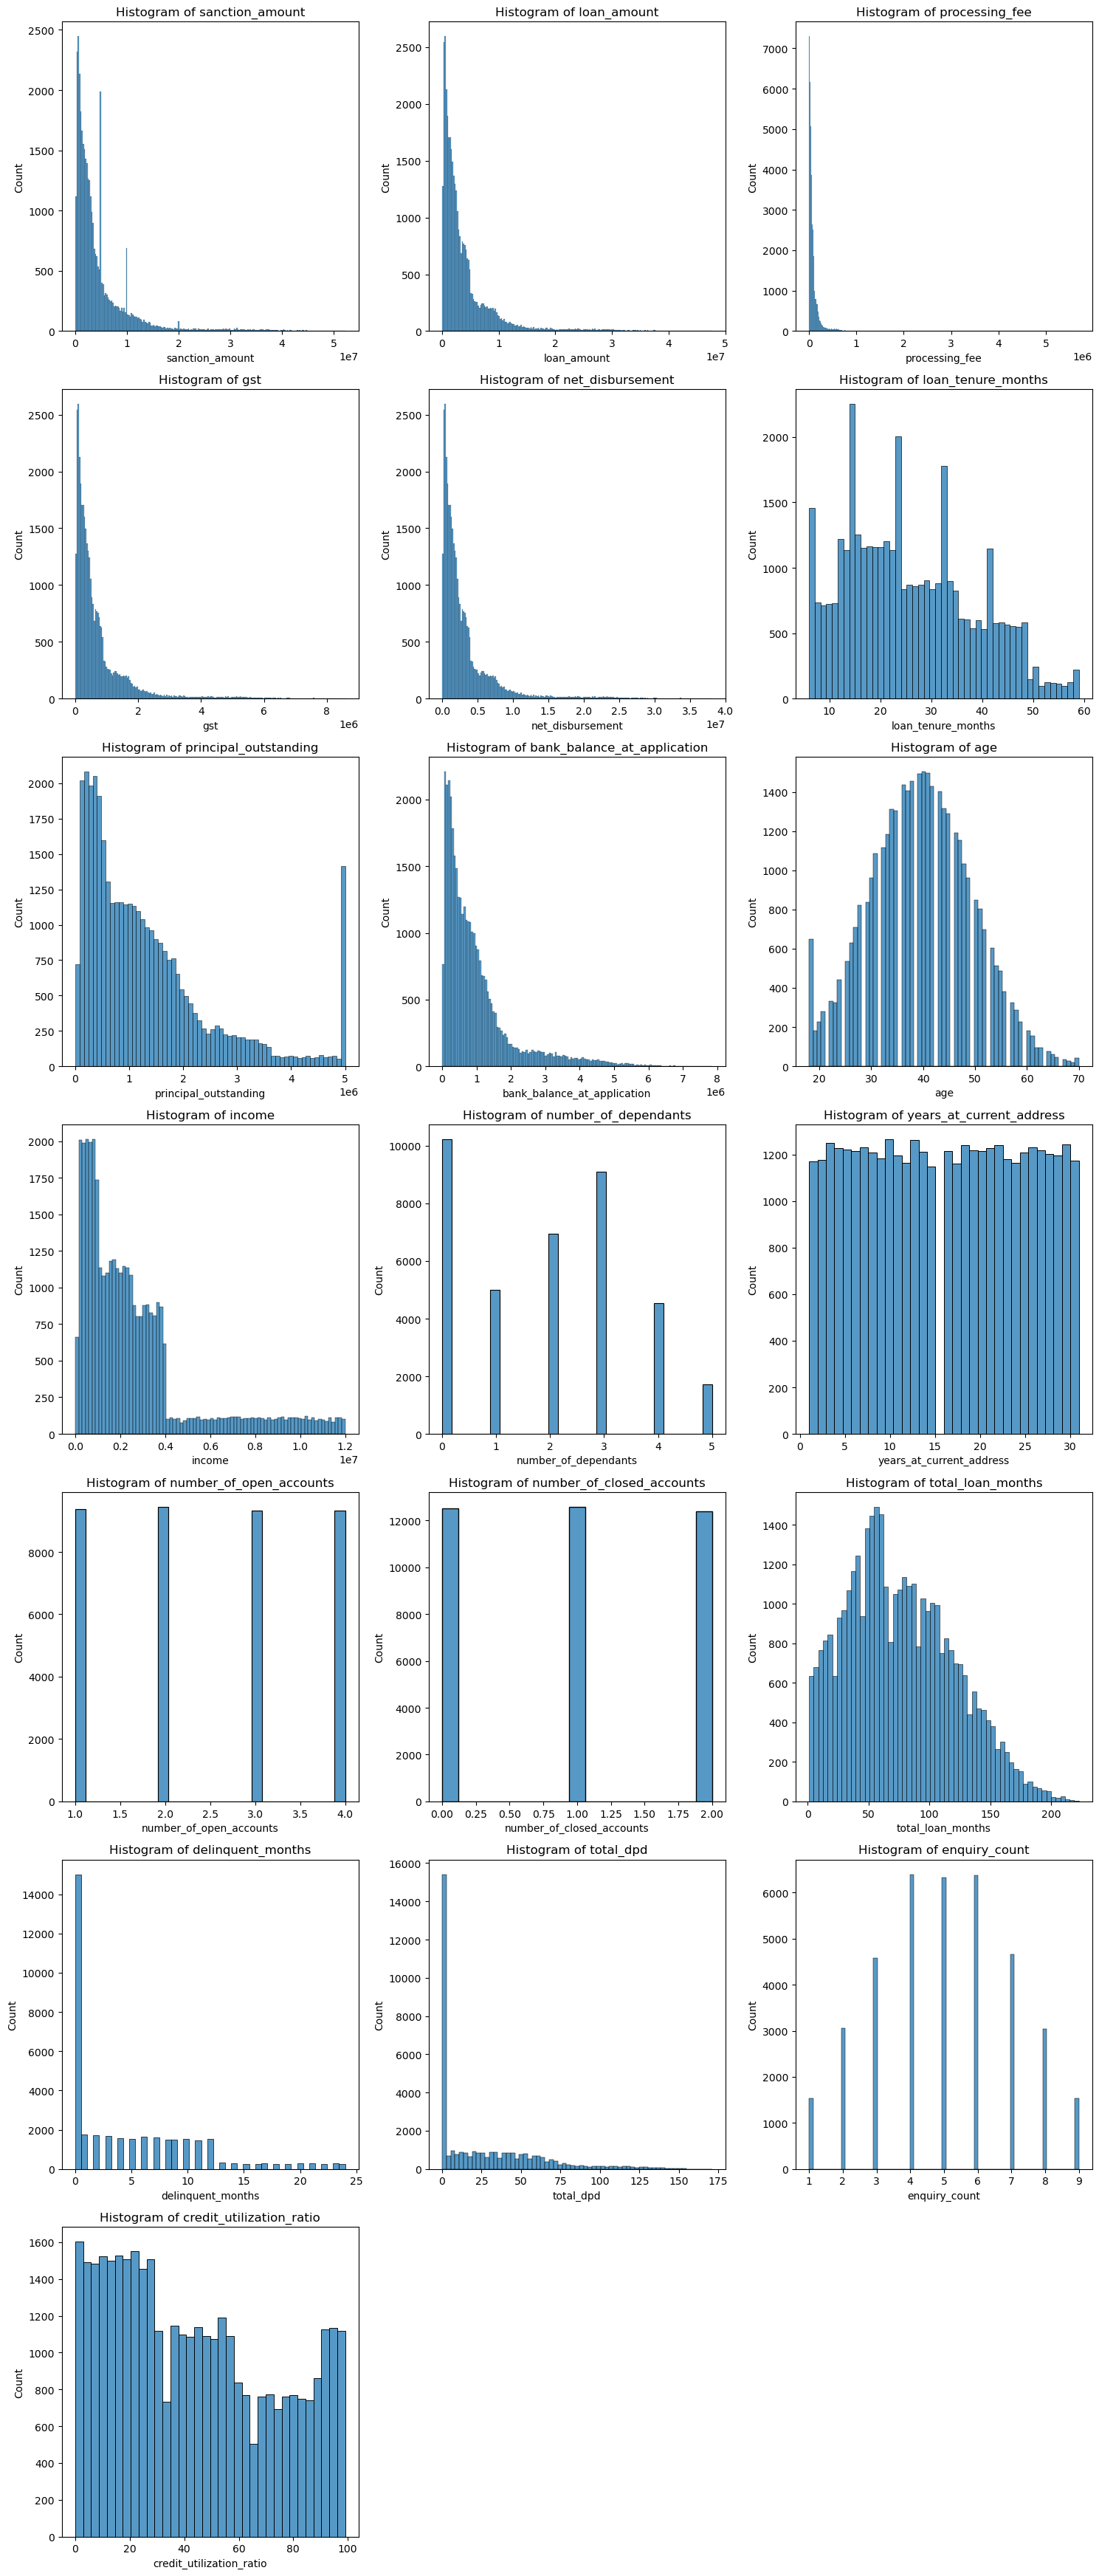

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define layout: adjust rows and columns based on how many plots you have
cols = 3
rows = (len(continious_columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Flatten the grid for easy looping

for i, col in enumerate(continious_columns):
    sns.histplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide unused subplots if columns < rows*cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [175]:
continious_columns 

['sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [176]:
 df_train[df_train["processing_fee"] > df_train["loan_amount"]]

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,L23982,C23982,Auto,Secured,2649000,2234000,2.669791e+06,402120,1787200,32,...,West Bengal,700001,4,2,154,9,31,6,26,0
9898,L09899,C09899,Personal,Unsecured,5000000,3626000,5.293544e+06,652680,2900800,6,...,Gujarat,380001,2,1,51,1,5,3,92,0
47089,L47090,C47090,Personal,Unsecured,1815000,1738000,1.858965e+06,312840,1390400,18,...,Rajasthan,302001,3,0,112,5,33,3,32,0
33705,L33706,C33706,Personal,Unsecured,5000000,3812000,5.678021e+06,686160,3049600,9,...,Gujarat,380001,3,1,140,0,0,5,47,0
12294,L12295,C12295,Education,Secured,5312000,4639000,5.698030e+06,835020,3711200,25,...,Gujarat,380001,1,2,58,0,0,3,86,0
28174,L28175,C28175,Personal,Unsecured,1025000,966000,1.214493e+06,173880,772800,18,...,Telangana,500001,3,0,111,8,41,3,62,0
29305,L29306,C29306,Personal,Unsecured,2872000,2616000,3.036378e+06,470880,2092800,21,...,Delhi,110001,2,2,42,11,65,3,2,0


In [177]:
 df_train[df_train["processing_fee"]/df_train["loan_amount"] > 0.3]

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,L23982,C23982,Auto,Secured,2649000,2234000,2.669791e+06,402120,1787200,32,...,West Bengal,700001,4,2,154,9,31,6,26,0
9898,L09899,C09899,Personal,Unsecured,5000000,3626000,5.293544e+06,652680,2900800,6,...,Gujarat,380001,2,1,51,1,5,3,92,0
47089,L47090,C47090,Personal,Unsecured,1815000,1738000,1.858965e+06,312840,1390400,18,...,Rajasthan,302001,3,0,112,5,33,3,32,0
33705,L33706,C33706,Personal,Unsecured,5000000,3812000,5.678021e+06,686160,3049600,9,...,Gujarat,380001,3,1,140,0,0,5,47,0
12294,L12295,C12295,Education,Secured,5312000,4639000,5.698030e+06,835020,3711200,25,...,Gujarat,380001,1,2,58,0,0,3,86,0
28174,L28175,C28175,Personal,Unsecured,1025000,966000,1.214493e+06,173880,772800,18,...,Telangana,500001,3,0,111,8,41,3,62,0
29305,L29306,C29306,Personal,Unsecured,2872000,2616000,3.036378e+06,470880,2092800,21,...,Delhi,110001,2,2,42,11,65,3,2,0


In [178]:
df_train_1 =  df_train[df_train["processing_fee"]/df_train["loan_amount"] < 0.3]

In [179]:
df_train_1[df_train["processing_fee"]/df_train["loan_amount"] > 0.3]

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<Axes: ylabel='processing_fee'>

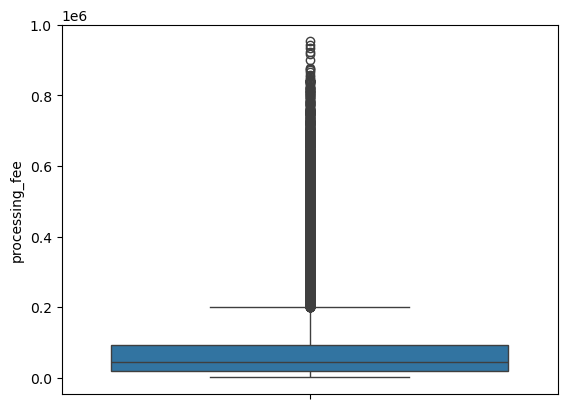

In [180]:
sns.boxplot(df_train_1["processing_fee"])

<Axes: xlabel='processing_fee', ylabel='Count'>

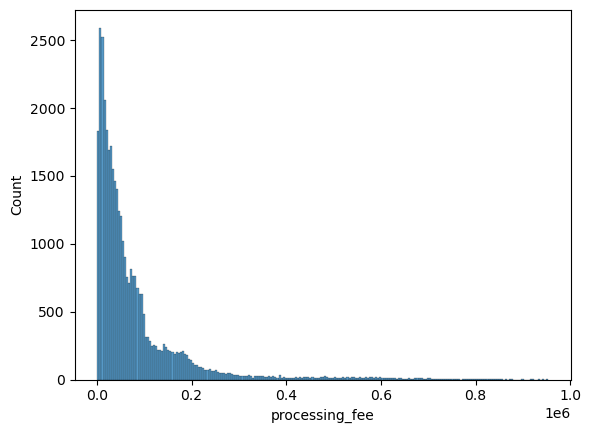

In [181]:
sns.histplot(df_train_1["processing_fee"])

In [182]:
df_train[df_train["gst"]/df_train["loan_amount"]>0.2]

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


# Exploratery Data Analysis

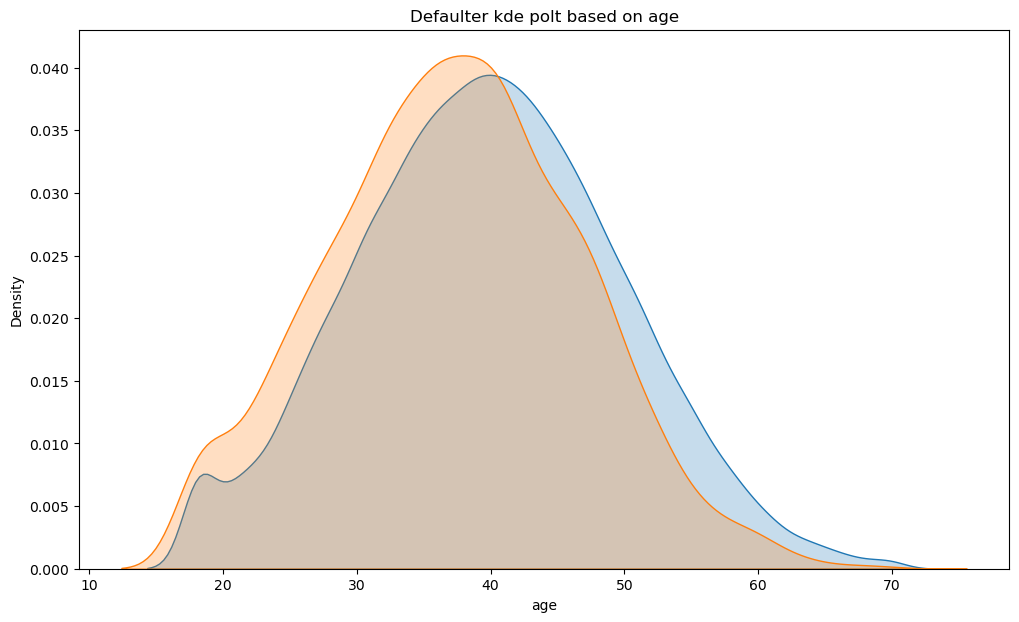

In [183]:
plt.figure(figsize=(12,7))
plt.title("Defaulter kde polt based on age")
sns.kdeplot(df_train_1[df_train_1["default"] == 0],x = "age",fill = True)
sns.kdeplot(df_train_1[df_train_1["default"] == 1],x = "age",fill = True)
plt.show()

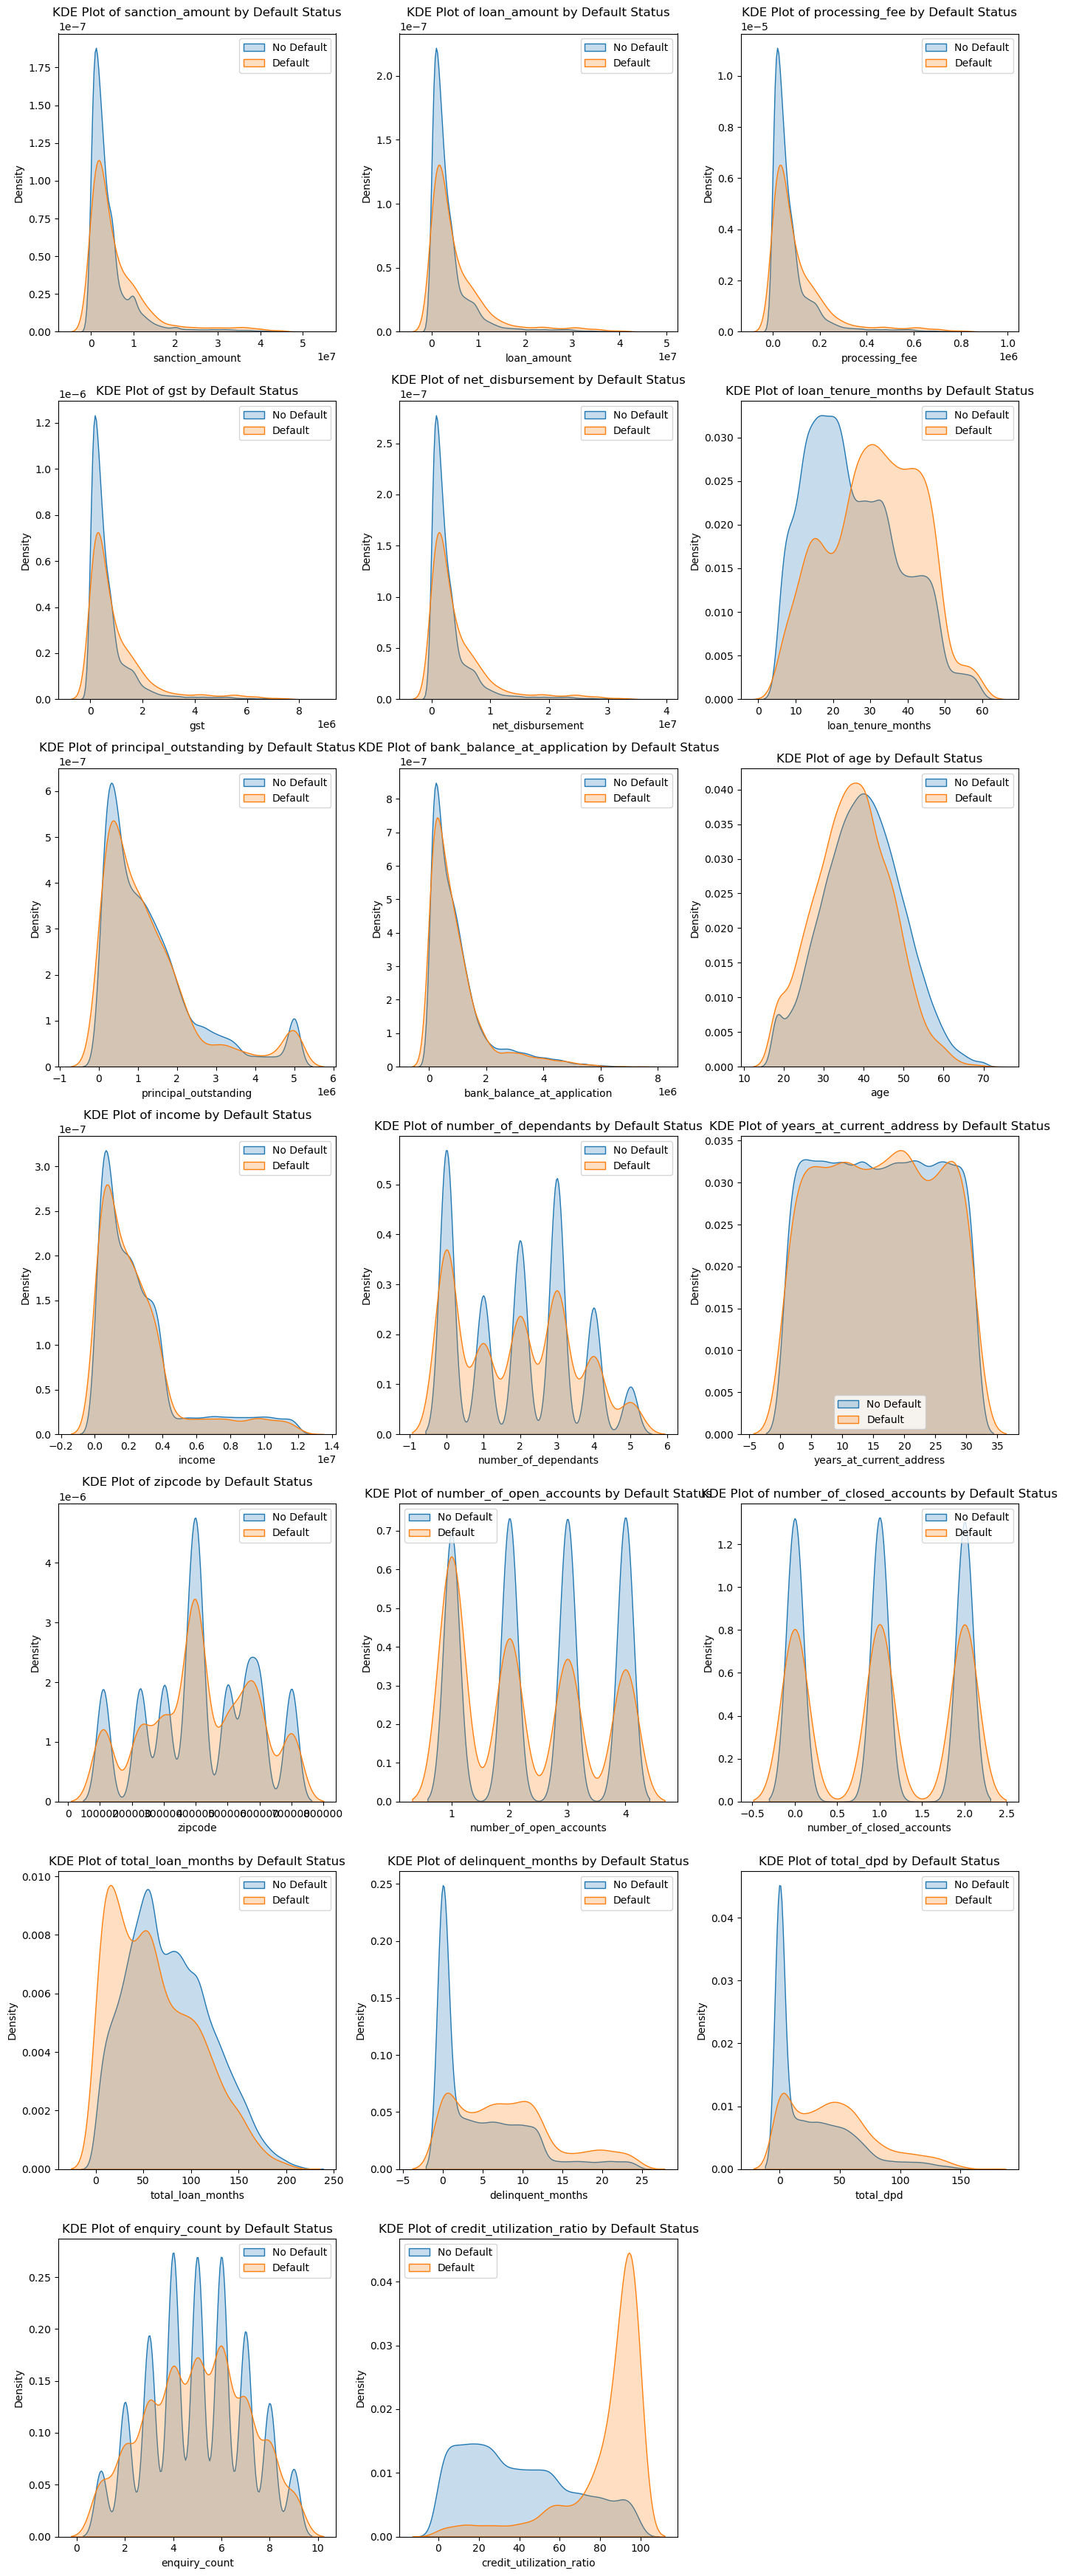

In [184]:
# Filter numeric columns only
numeric_cols = df_train.select_dtypes(include='number').columns.drop('default')

# Set up the plot grid
num_plots = len(numeric_cols)
cols = 3  # number of columns in the plot grid
rows = (num_plots + 1) // cols

plt.figure(figsize=(14, 5 * rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, idx)
    plt.title(f"KDE Plot of {col} by Default Status")
    sns.kdeplot(data=df_train_1[df_train_1["default"] == 0], x=col, fill=True, label="No Default")
    sns.kdeplot(data=df_train_1[df_train_1["default"] == 1], x=col, fill=True, label="Default")
    plt.legend()

plt.tight_layout()
plt.show()

In [185]:
df_train_1.select_dtypes(include="object")

,loan_id,cust_id,loan_purpose,loan_type,disbursal_date,installment_start_dt,gender,marital_status,employment_status,residence_type,city,state
27434,L27435,C27435,Home,Secured,2022-04-21,2022-05-21,F,Single,Salaried,Owned,Ahmedabad,Gujarat
13400,L13401,C13401,Auto,Secured,2020-11-24,2020-12-11,M,Single,Salaried,Owned,Delhi,Delhi
883,L00884,C00884,Personal,Unsecured,2019-08-25,2019-09-19,F,Single,Self-Employed,Mortgage,Lucknow,Uttar Pradesh
7303,L07304,C07304,Auto,Secured,2020-04-16,2020-05-05,F,Single,Self-Employed,Owned,Bangalore,Karnataka
45124,L45125,C45125,Education,Secured,2024-01-26,2024-02-17,F,Single,Salaried,Owned,Jaipur,Rajasthan
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,L11285,C11285,Auto,Secured,2020-09-08,2020-09-17,F,Single,Salaried,Rented,Hyderabad,Telangana
44732,L44733,C44733,Auto,Secured,2024-01-12,2024-01-21,F,Single,Salaried,Owned,Delhi,Delhi
38158,L38159,C38159,Home,Secured,2023-05-17,2023-06-14,M,Married,Self-Employed,Rented,Kolkata,West Bengal
860,L00861,C00861,Education,Secured,2019-08-25,2019-09-12,F,Married,Salaried,Owned,Mumbai,Maharashtra


In [186]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      37487 non-null  object 
 1   cust_id                      37487 non-null  object 
 2   loan_purpose                 37487 non-null  object 
 3   loan_type                    37487 non-null  object 
 4   sanction_amount              37487 non-null  int64  
 5   loan_amount                  37487 non-null  int64  
 6   processing_fee               37487 non-null  float64
 7   gst                          37487 non-null  int64  
 8   net_disbursement             37487 non-null  int64  
 9   loan_tenure_months           37487 non-null  int64  
 10  principal_outstanding        37487 non-null  int64  
 11  bank_balance_at_application  37487 non-null  int64  
 12  disbursal_date               37487 non-null  object 
 13  installment_start

<h2 style="text-align: center; color: teal;"> Feature Engineering</h2>


In [187]:
df_train.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

*loan_to_income_ratio*

In [188]:
df_train_1["loan_to_income_ratio"] = (df_train_1["loan_amount"]/df_train_1["income"]).round(2)
df_train_1["loan_to_income_ratio"].describe()


count    37487.000000
mean         1.554890
std          0.972907
min          0.300000
25%          0.770000
50%          1.160000
75%          2.450000
max          4.570000
Name: loan_to_income_ratio, dtype: float64

In [189]:
df_test["loan_to_income_ratio"] = (df_test["loan_amount"]/df_test["income"]).round(2)
df_test[["loan_to_income_ratio"]].describe()

,loan_to_income_ratio
count,12498.000000
mean,1.556737
std,0.968140
min,0.300000
25%,0.770000
50%,1.170000
75%,2.450000
max,4.590000


In [190]:
df_train_1[["loan_to_income_ratio"]].head()

,loan_to_income_ratio
27434,2.90
13400,1.08
883,0.66
7303,1.10
45124,1.84


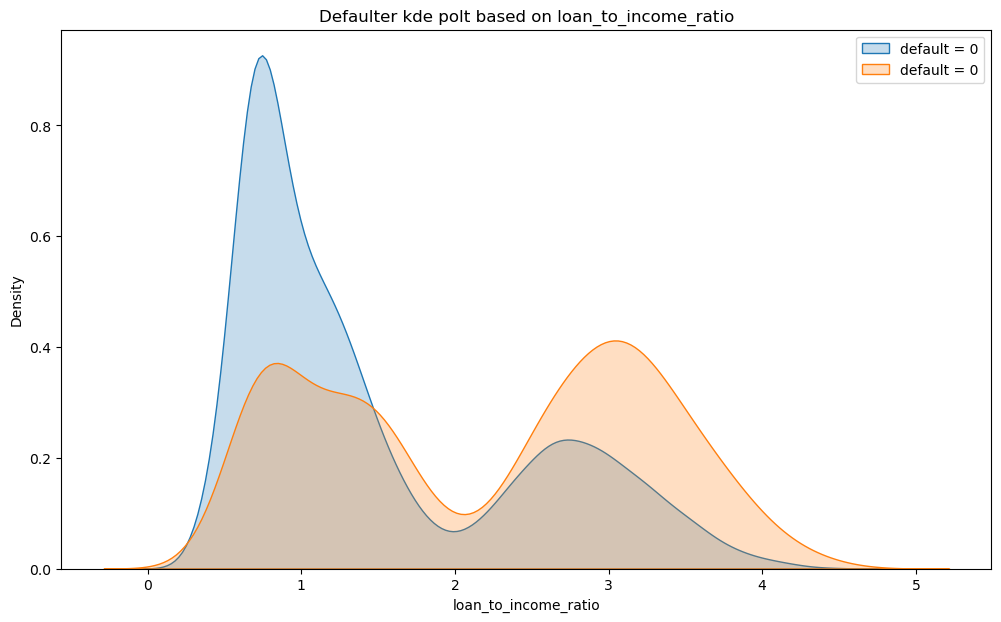

In [191]:
plt.figure(figsize=(12,7))
plt.title("Defaulter kde polt based on loan_to_income_ratio")
sns.kdeplot(df_train_1[df_train_1["default"] == 0],x = "loan_to_income_ratio",fill = True,label = "default = 0")
sns.kdeplot(df_train_1[df_train_1["default"] == 1],x = "loan_to_income_ratio",fill = True,label = "default = 0")
plt.legend()
plt.show()

In [192]:
df_train_1["delinquency_ratio"] = (df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"]).round(2)
df_train_1["delinquency_ratio"].isna().sum()

np.int64(0)

In [193]:
df_test["delinquency_ratio"] = (df_test["delinquent_months"]*100/df_test["total_loan_months"]).round(2)
df_test["delinquency_ratio"].isna().sum()

np.int64(0)

In [194]:
df_train_1[["delinquency_ratio"]].head()

,delinquency_ratio
27434,6.67
13400,3.36
883,16.87
7303,0.00
45124,9.68


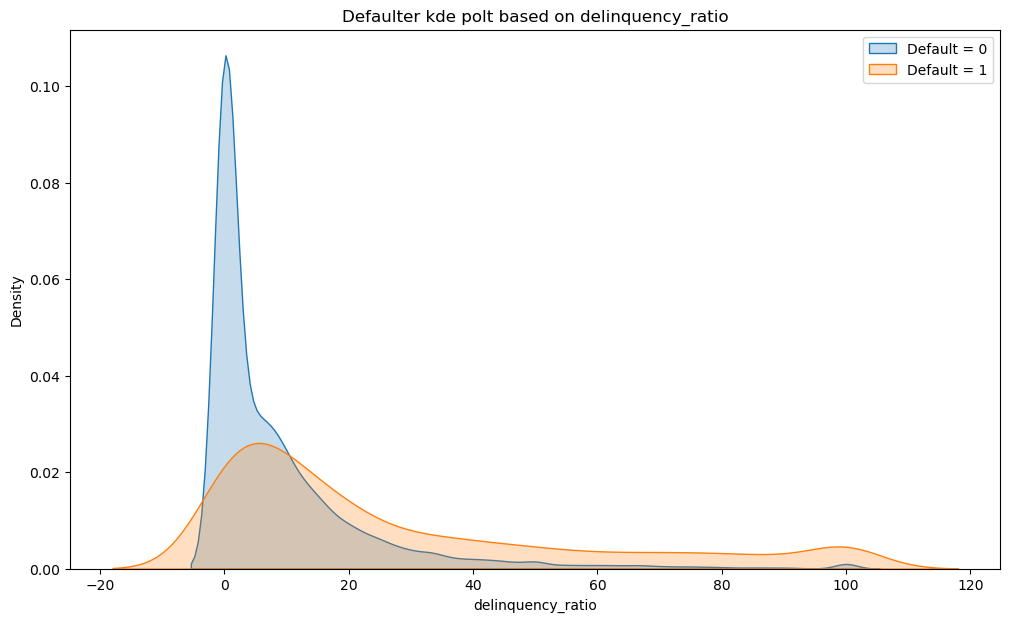

In [195]:
plt.figure(figsize=(12,7))
plt.title("Defaulter kde polt based on delinquency_ratio")
sns.kdeplot(df_train_1[df_train_1["default"] == 0],x = "delinquency_ratio",fill = True,label = "Default = 0")
sns.kdeplot(df_train_1[df_train_1["default"] == 1],x = "delinquency_ratio",fill = True,label = "Default = 1")
plt.legend()
plt.show()

In [196]:
df_train_1["average_dpt_per_deliquant_month"] = (np.where(df_train_1["delinquent_months"] > 0,df_train_1["total_dpd"]/df_train_1["delinquent_months"] , 0)).round(2)
df_train_1["average_dpt_per_deliquant_month"].isna().sum()

np.int64(0)

In [197]:
df_train_1[["average_dpt_per_deliquant_month"]].head()

,average_dpt_per_deliquant_month
27434,5.50
13400,4.25
883,5.57
7303,0.00
45124,4.67


In [198]:
df_test["average_dpt_per_deliquant_month"] = (np.where(df_test["delinquent_months"] > 0,df_test["total_dpd"]/df_test["delinquent_months"] , 0)).round(2)
df_test["average_dpt_per_deliquant_month"].isna().sum()

np.int64(0)

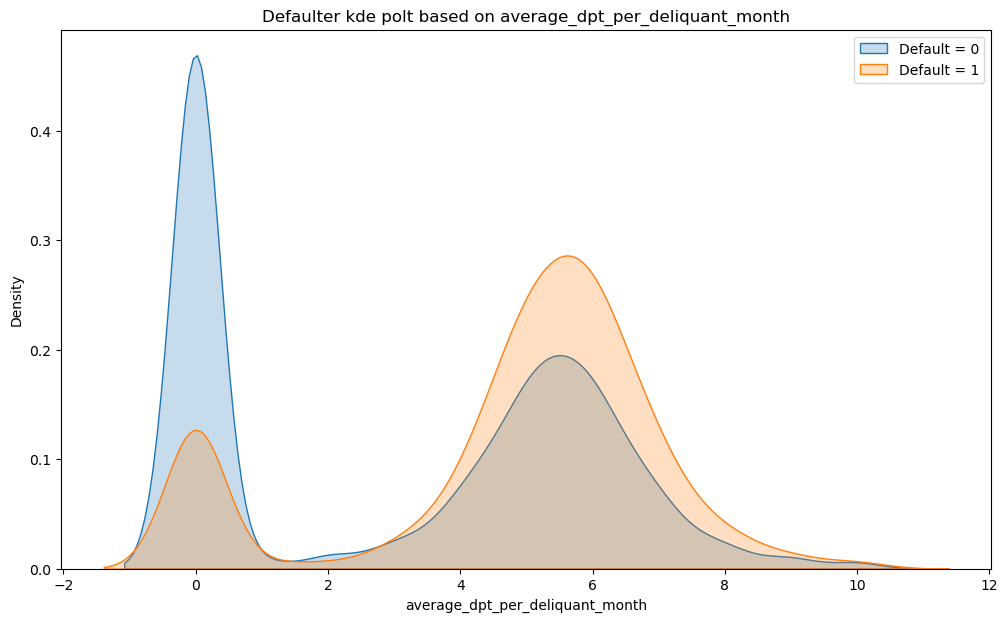

In [199]:
plt.figure(figsize=(12,7))
plt.title("Defaulter kde polt based on average_dpt_per_deliquant_month")
sns.kdeplot(df_train_1[df_train_1["default"] == 0],x = "average_dpt_per_deliquant_month",fill = True,label = "Default = 0")
sns.kdeplot(df_train_1[df_train_1["default"] == 1],x = "average_dpt_per_deliquant_month",fill = True,label = "Default = 1")
plt.legend()
plt.show()



## Feature selection

In [200]:
df_train_1.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'delinquency_ratio',
       'average_dpt_per_deliquant_month'],
      dtype='object')

In [201]:
col_to_drop = ["zipcode","loan_id","cust_id","installment_start_dt","disbursal_date","loan_amount","income","delinquent_months","total_loan_months","total_dpd"]
df_train_2 = df_train_1.drop(columns = col_to_drop)
df_test = df_test.drop(columns =col_to_drop )

In [202]:
df_train_2.columns

Index(['loan_purpose', 'loan_type', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'age', 'gender', 'marital_status',
       'employment_status', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'average_dpt_per_deliquant_month'],
      dtype='object')

In [203]:
df_train_3 = df_train_2.select_dtypes(["int64","float64"])
df_train_3.head()

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,number_of_dependants,years_at_current_address,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month
27434,3458000,65520.0,589680,2620800,24,905176,566117,45,0,5,4,2,8,59,0,2.90,6.67,5.50
13400,3103000,50800.0,457200,2032000,33,1008916,951329,29,0,25,3,1,4,92,0,1.08,3.36,4.25
883,2288000,38400.0,345600,1536000,19,1382399,771873,50,0,29,2,1,4,83,0,0.66,16.87,5.57
7303,307000,5960.0,53640,238400,21,170015,117343,43,1,27,1,1,5,34,0,1.10,0.00,0.00
45124,283000,5200.0,46800,208000,45,72025,67719,31,0,27,2,0,5,19,0,1.84,9.68,4.67


*Scaling*

In [204]:
df_train_3.head()

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,number_of_dependants,years_at_current_address,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month
27434,3458000,65520.0,589680,2620800,24,905176,566117,45,0,5,4,2,8,59,0,2.90,6.67,5.50
13400,3103000,50800.0,457200,2032000,33,1008916,951329,29,0,25,3,1,4,92,0,1.08,3.36,4.25
883,2288000,38400.0,345600,1536000,19,1382399,771873,50,0,29,2,1,4,83,0,0.66,16.87,5.57
7303,307000,5960.0,53640,238400,21,170015,117343,43,1,27,1,1,5,34,0,1.10,0.00,0.00
45124,283000,5200.0,46800,208000,45,72025,67719,31,0,27,2,0,5,19,0,1.84,9.68,4.67


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_detector(data):
    vif_df = pd.DataFrame()
    vif_df["columns"] = data.columns
    vif_df["vif"] = [variance_inflation_factor(data.values ,i ) for i in range(data.shape[1])]
    return vif_df


In [206]:
vif_detector(df_train_3)

,columns,vif
0,sanction_amount,103.380217
1,processing_fee,inf
2,gst,inf
3,net_disbursement,inf
4,loan_tenure_months,9.224506
5,principal_outstanding,16.823670
6,bank_balance_at_application,9.373479
7,age,12.775132
8,number_of_dependants,2.776563
9,years_at_current_address,3.889986


In [207]:
df_train_3 = df_train_3.drop(columns = ["processing_fee","gst","net_disbursement","sanction_amount","bank_balance_at_application"])

In [208]:
vif_detector(df_train_3)

,columns,vif
0,loan_tenure_months,9.030029
1,principal_outstanding,2.239016
2,age,12.102523
3,number_of_dependants,2.775963
4,years_at_current_address,3.873039
5,number_of_open_accounts,8.961886
6,number_of_closed_accounts,2.402161
7,enquiry_count,9.501124
8,credit_utilization_ratio,3.616409
9,default,1.526396


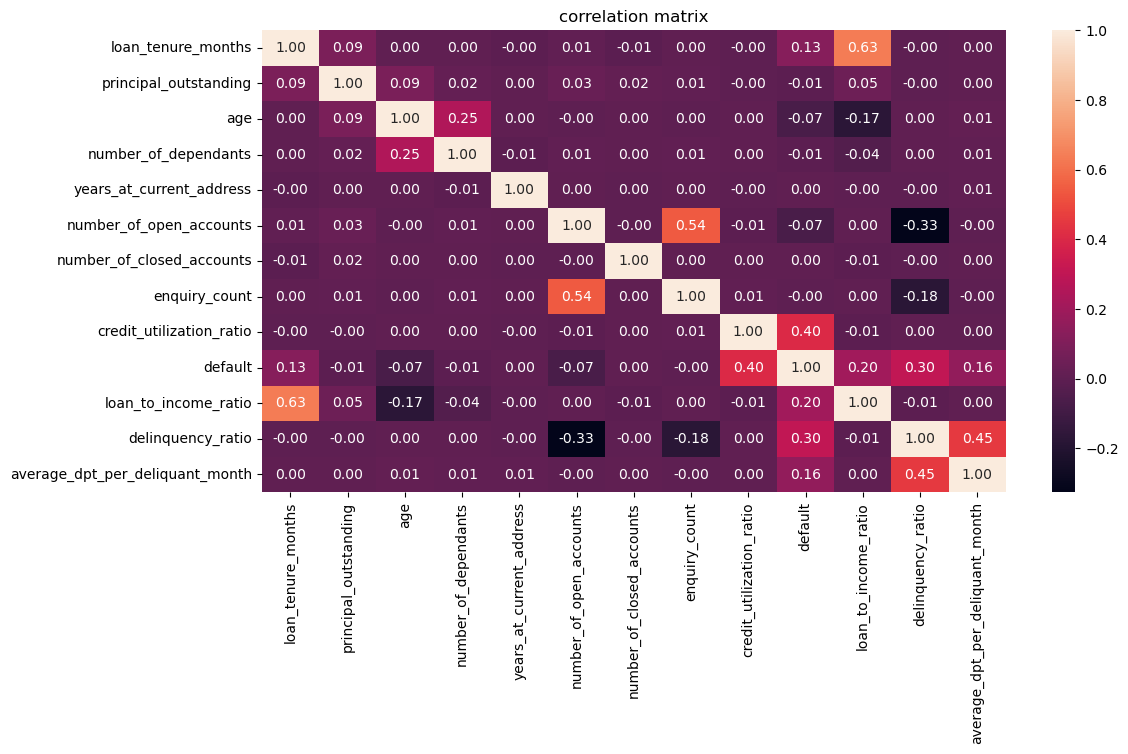

In [216]:
plt.figure(figsize=(12,6))
plt.title("correlation matrix")
correlation_matrix = df_train_3.corr()
sns.heatmap(correlation_matrix,annot = True,fmt = "0.2f")
plt.show()

# WOE and IV

In [217]:
df_train_1.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'delinquency_ratio',
       'average_dpt_per_deliquant_month'],
      dtype='object')

In [218]:
df_train_1["default"].value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [219]:
def woe_and_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(["count","sum"])
    grouped = grouped.rename(columns = {"count":"total","sum":"good"})
    grouped["bad"] = (grouped.total-grouped.good)
    total_good = grouped["good"].sum()
    total_bad = grouped["bad"].sum()
    grouped["good_pct"] = grouped["good"]/total_good
    grouped["bad_pct"] = grouped["bad"]/total_bad
    grouped["woe"] = np.where(grouped["bad_pct"] > 0 ,np.log(grouped["good_pct"]/grouped["bad_pct"]),0)
    grouped["iv"] = grouped.woe*(grouped["good_pct"] - grouped["bad_pct"])
    total_iv = grouped["iv"].sum()
    return grouped ,total_iv

In [220]:
g , iv = woe_and_iv(df_train_1,"loan_purpose","default")

In [221]:
print(iv)

0.39377543144164784


In [222]:
df_train_3.head()

,loan_tenure_months,principal_outstanding,age,number_of_dependants,years_at_current_address,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month
27434,24,905176,45,0,5,4,2,8,59,0,2.90,6.67,5.50
13400,33,1008916,29,0,25,3,1,4,92,0,1.08,3.36,4.25
883,19,1382399,50,0,29,2,1,4,83,0,0.66,16.87,5.57
7303,21,170015,43,1,27,1,1,5,34,0,1.10,0.00,0.00
45124,45,72025,31,0,27,2,0,5,19,0,1.84,9.68,4.67


In [223]:
df_train_2.columns


Index(['loan_purpose', 'loan_type', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'age', 'gender', 'marital_status',
       'employment_status', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'average_dpt_per_deliquant_month'],
      dtype='object')

In [224]:
iv_values = {}

for col in df_train_2.columns:
    if df_train_2[col].dtype == "object":
        g, iv = woe_and_iv(df_train_2, col, "default")
    else:
        df_binned =pd.DataFrame()
        df_binned["binned"] = pd.cut(df_train_2[col], bins=10, labels=False)
        df_binned["default"] = df_train_2["default"]
        g, iv = woe_and_iv(df_binned, "binned", "default")
    
    iv_values[col] = iv

iv_values


{'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'sanction_amount': np.float64(0.1067215843237773),
 'processing_fee': np.float64(inf),
 'gst': np.float64(inf),
 'net_disbursement': np.float64(inf),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'principal_outstanding': np.float64(0.01829947830697728),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'age': np.float64(0.07536498553272478),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.0011854944190245933),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824

In [225]:
v_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
v_df

,Feature,IV
0,loan_purpose,0.393775
1,loan_type,0.173047
2,sanction_amount,0.106722
3,processing_fee,inf
4,gst,inf
5,net_disbursement,inf
6,loan_tenure_months,0.234506
7,principal_outstanding,0.018299
8,bank_balance_at_application,0.004242
9,age,0.075365


In [226]:
selected_features = [feature for feature , iv in iv_values.items()  if iv >0.02]

In [227]:
selected_features

['loan_purpose',
 'loan_type',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'age',
 'residence_type',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'default',
 'loan_to_income_ratio',
 'delinquency_ratio',
 'average_dpt_per_deliquant_month']

In [228]:
df_train_4 = df_train_2[selected_features]
df_test_2 =  df_test[selected_features]
df_train_2.head()

,loan_purpose,loan_type,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,...,city,state,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month
27434,Home,Secured,3458000,65520.0,589680,2620800,24,905176,566117,45,...,Ahmedabad,Gujarat,4,2,8,59,0,2.90,6.67,5.50
13400,Auto,Secured,3103000,50800.0,457200,2032000,33,1008916,951329,29,...,Delhi,Delhi,3,1,4,92,0,1.08,3.36,4.25
883,Personal,Unsecured,2288000,38400.0,345600,1536000,19,1382399,771873,50,...,Lucknow,Uttar Pradesh,2,1,4,83,0,0.66,16.87,5.57
7303,Auto,Secured,307000,5960.0,53640,238400,21,170015,117343,43,...,Bangalore,Karnataka,1,1,5,34,0,1.10,0.00,0.00
45124,Education,Secured,283000,5200.0,46800,208000,45,72025,67719,31,...,Jaipur,Rajasthan,2,0,5,19,0,1.84,9.68,4.67


In [229]:
df_train_4.shape

(37487, 15)

In [230]:
df_test_2.shape

(12500, 15)

In [231]:
df_train_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan_purpose                     37487 non-null  object 
 1   loan_type                        37487 non-null  object 
 2   sanction_amount                  37487 non-null  int64  
 3   processing_fee                   37487 non-null  float64
 4   gst                              37487 non-null  int64  
 5   net_disbursement                 37487 non-null  int64  
 6   loan_tenure_months               37487 non-null  int64  
 7   age                              37487 non-null  int64  
 8   residence_type                   37487 non-null  object 
 9   number_of_open_accounts          37487 non-null  int64  
 10  credit_utilization_ratio         37487 non-null  int64  
 11  default                          37487 non-null  int64  
 12  loan_to_income_rati

In [232]:
df_train_encoded =pd.get_dummies(df_train_4,drop_first = True)
df_test_encoded =pd.get_dummies(df_test_2,drop_first = True)

In [233]:
df_train_encoded.head()

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,age,number_of_open_accounts,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
27434,3458000,65520.0,589680,2620800,24,45,4,59,0,2.90,6.67,5.50,False,True,False,False,True,False
13400,3103000,50800.0,457200,2032000,33,29,3,92,0,1.08,3.36,4.25,False,False,False,False,True,False
883,2288000,38400.0,345600,1536000,19,50,2,83,0,0.66,16.87,5.57,False,False,True,True,False,False
7303,307000,5960.0,53640,238400,21,43,1,34,0,1.10,0.00,0.00,False,False,False,False,True,False
45124,283000,5200.0,46800,208000,45,31,2,19,0,1.84,9.68,4.67,True,False,False,False,True,False


In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_final = scaler.fit_transform(df_train_encoded)
df_test_final = scaler.fit_transform(df_test_encoded)

In [239]:
df_train_encoded.head()

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,age,number_of_open_accounts,credit_utilization_ratio,default,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
27434,3458000,65520.0,589680,2620800,24,45,4,59,0,2.90,6.67,5.50,False,True,False,False,True,False
13400,3103000,50800.0,457200,2032000,33,29,3,92,0,1.08,3.36,4.25,False,False,False,False,True,False
883,2288000,38400.0,345600,1536000,19,50,2,83,0,0.66,16.87,5.57,False,False,True,True,False,False
7303,307000,5960.0,53640,238400,21,43,1,34,0,1.10,0.00,0.00,False,False,False,False,True,False
45124,283000,5200.0,46800,208000,45,31,2,19,0,1.84,9.68,4.67,True,False,False,False,True,False


In [250]:
df_train_final = pd.DataFrame(data = df_train_final, columns = df_train_encoded.columns )

In [252]:
df_test_final = pd.DataFrame(data = df_test_final, columns = df_test_encoded.columns )

# MODEL TRAINING

In [253]:
X_train = df_train_final.drop(columns = "default")
y_train = df_train_final["default"]
X_test = df_test_final.drop(columns = "default")
y_test = df_test_final["default"]

In [254]:
X_test.head()

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,age,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
0,0.126154,0.098580,0.098580,0.098580,0.528302,0.346154,0.333333,0.121212,0.256410,0.0429,0.900,1.0,0.0,0.0,0.0,1.0,0.0
1,0.214602,0.184655,0.184655,0.184655,0.622642,0.288462,1.000000,0.858586,0.685315,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
2,0.076841,0.067525,0.067525,0.067525,0.622642,0.192308,1.000000,0.727273,0.631702,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.034199,0.027186,0.027186,0.027186,0.188679,0.192308,0.666667,0.909091,0.186480,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0
4,0.048063,0.044292,0.044292,0.044292,0.377358,0.653846,1.000000,0.535354,0.167832,0.1316,0.525,0.0,0.0,0.0,0.0,1.0,0.0


## Training models without handeling class imbalence 


In [255]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [256]:
X_test.isna().sum()

sanction_amount                    0
processing_fee                     0
gst                                0
net_disbursement                   0
loan_tenure_months                 0
age                                0
number_of_open_accounts            0
credit_utilization_ratio           0
loan_to_income_ratio               2
delinquency_ratio                  0
average_dpt_per_deliquant_month    0
loan_purpose_Education             0
loan_purpose_Home                  0
loan_purpose_Personal              0
loan_type_Unsecured                0
residence_type_Owned               0
residence_type_Rented              0
dtype: int64

In [257]:
X_train.fillna(0)
X_test.fillna(0)

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,age,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
0,0.126154,0.098580,0.098580,0.098580,0.528302,0.346154,0.333333,0.121212,0.256410,0.0429,0.900,1.0,0.0,0.0,0.0,1.0,0.0
1,0.214602,0.184655,0.184655,0.184655,0.622642,0.288462,1.000000,0.858586,0.685315,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
2,0.076841,0.067525,0.067525,0.067525,0.622642,0.192308,1.000000,0.727273,0.631702,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.034199,0.027186,0.027186,0.027186,0.188679,0.192308,0.666667,0.909091,0.186480,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0
4,0.048063,0.044292,0.044292,0.044292,0.377358,0.653846,1.000000,0.535354,0.167832,0.1316,0.525,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.007759,0.007633,0.007633,0.007633,0.037736,0.461538,0.333333,0.191919,0.118881,0.1667,0.686,0.0,0.0,1.0,1.0,1.0,0.0
12496,0.063561,0.061963,0.061963,0.061963,0.358491,0.423077,0.666667,0.171717,0.216783,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.027367,0.020808,0.020808,0.020808,0.245283,0.326923,0.000000,0.272727,0.072261,0.0000,0.000,0.0,0.0,1.0,1.0,0.0,0.0
12498,0.011467,0.011042,0.011042,0.011042,0.283019,0.711538,0.666667,0.161616,0.093240,0.0543,0.640,0.0,0.0,1.0,1.0,1.0,0.0


In [258]:
X_test_new = X_test.fillna(0)
X_test_new

,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,age,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,average_dpt_per_deliquant_month,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
0,0.126154,0.098580,0.098580,0.098580,0.528302,0.346154,0.333333,0.121212,0.256410,0.0429,0.900,1.0,0.0,0.0,0.0,1.0,0.0
1,0.214602,0.184655,0.184655,0.184655,0.622642,0.288462,1.000000,0.858586,0.685315,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
2,0.076841,0.067525,0.067525,0.067525,0.622642,0.192308,1.000000,0.727273,0.631702,0.0000,0.000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.034199,0.027186,0.027186,0.027186,0.188679,0.192308,0.666667,0.909091,0.186480,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0
4,0.048063,0.044292,0.044292,0.044292,0.377358,0.653846,1.000000,0.535354,0.167832,0.1316,0.525,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.007759,0.007633,0.007633,0.007633,0.037736,0.461538,0.333333,0.191919,0.118881,0.1667,0.686,0.0,0.0,1.0,1.0,1.0,0.0
12496,0.063561,0.061963,0.061963,0.061963,0.358491,0.423077,0.666667,0.171717,0.216783,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.027367,0.020808,0.020808,0.020808,0.245283,0.326923,0.000000,0.272727,0.072261,0.0000,0.000,0.0,0.0,1.0,1.0,0.0,0.0
12498,0.011467,0.011042,0.011042,0.011042,0.283019,0.711538,0.666667,0.161616,0.093240,0.0543,0.640,0.0,0.0,1.0,1.0,1.0,0.0


In [259]:
y_pred_lr = lr.predict(X_test_new)

In [260]:
from sklearn.metrics import classification_report
report = classification_report(y_pred_lr,y_test)

In [261]:
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11590
         1.0       0.69      0.84      0.76       910

    accuracy                           0.96     12500
   macro avg       0.84      0.90      0.87     12500
weighted avg       0.97      0.96      0.96     12500



In [262]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [263]:
y_pred_xgb = xgb.predict(X_test_new)

In [264]:
from sklearn.metrics import classification_report
report = classification_report(y_pred_xgb,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11537
           1       0.72      0.83      0.77       963

    accuracy                           0.96     12500
   macro avg       0.85      0.90      0.87     12500
weighted avg       0.97      0.96      0.96     12500



In [265]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test_new)

In [266]:
from sklearn.metrics import classification_report
report = classification_report(y_pred_rfc,y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11605
         1.0       0.69      0.85      0.76       895

    accuracy                           0.96     12500
   macro avg       0.84      0.91      0.87     12500
weighted avg       0.97      0.96      0.96     12500



## Training model after handeling class imbalence

In [267]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state = 43)
X_train_smt , y_train_smt = smt.fit_resample(X_train,y_train)

In [268]:
from imblearn.under_sampling import RandomUnderSampler

uns = RandomUnderSampler(random_state=42)
X_train_uns, y_train_uns = uns.fit_resample(X_train, y_train)


In [269]:
y_train_smt.value_counts()

default
0.0    34246
1.0    34246
Name: count, dtype: int64

In [270]:
from sklearn.linear_model import LogisticRegression
lr_2 =  LogisticRegression()
lr_2.fit(X_train_smt,y_train_smt)
y_pred_lr_2 = lr_2.predict(X_test_new)
report = classification_report(y_pred_lr_2,y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10683
         1.0       0.94      0.57      0.71      1817

    accuracy                           0.93     12500
   macro avg       0.94      0.78      0.84     12500
weighted avg       0.93      0.93      0.93     12500



In [271]:
from sklearn.linear_model import LogisticRegression
lr_3 =  LogisticRegression()
lr_3.fit(X_train_uns,y_train_uns)
y_pred_lr_3 = lr_3.predict(X_test_new)
report = classification_report(y_pred_lr_3,y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     10525
         1.0       0.95      0.53      0.68      1975

    accuracy                           0.92     12500
   macro avg       0.94      0.76      0.82     12500
weighted avg       0.92      0.92      0.91     12500



In [272]:
from sklearn.ensemble import RandomForestClassifier 
rfc_2 =  RandomForestClassifier()
rfc_2.fit(X_train_smt,y_train_smt)
y_pred_rfc_2 = rfc_2.predict(X_test_new)
report = classification_report(y_pred_rfc_2,y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     11137
         1.0       0.87      0.71      0.78      1363

    accuracy                           0.96     12500
   macro avg       0.92      0.85      0.88     12500
weighted avg       0.95      0.96      0.95     12500



In [273]:
from xgboost import XGBClassifier
xgb_2 =  XGBClassifier()
xgb_2.fit(X_train_smt,y_train_smt)
y_pred_xgb_2 = xgb_2.predict(X_test_new)
report = classification_report(y_pred_xgb_2,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11277
           1       0.83      0.75      0.79      1223

    accuracy                           0.96     12500
   macro avg       0.90      0.87      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [274]:
from sklearn.model_selection import RandomizedSearchCV
model =  XGBClassifier()
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.5, 1, 2, 3, 4, 5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1]
}
        
clf = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train_smt,y_train_smt)

,estimator,"XGBClassifier...ate=None, ...)"
,param_distributions,"{'colsample_bytree': [0.5, 0.6, ...], 'gamma': [0, 0.5, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,15
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [275]:
clf.best_params_

{'subsample': 0.5,
 'reg_lambda': 0.1,
 'reg_alpha': 0.5,
 'n_estimators': 500,
 'min_child_weight': 8,
 'max_depth': 9,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.7}

In [276]:
clf.best_score_

np.float64(0.9781290827910094)

In [277]:
y_pred_clf = clf.predict(X_test_new)

In [278]:
report_clf = classification_report(y_test,y_pred_clf)
print(report_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     11392
         1.0       0.77      0.78      0.78      1108

    accuracy                           0.96     12500
   macro avg       0.87      0.88      0.88     12500
weighted avg       0.96      0.96      0.96     12500



*we want recall more than 90 so we keep threshold to  0.04*

In [279]:
y_proba = clf.predict_proba(X_test_new)[:, 1]
threshold = 0.04
y_pred_custom = (y_proba >= threshold ).astype(int)

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred_custom))

Recall: 0.9494584837545126


In [280]:
report_clf = classification_report(y_test,y_pred_custom)
print(report_clf)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     11392
         1.0       0.58      0.95      0.72      1108

    accuracy                           0.93     12500
   macro avg       0.79      0.94      0.84     12500
weighted avg       0.96      0.93      0.94     12500



## Hyperparameter tuning using optuna

In [281]:
import optuna 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer, f1_score


## Logistic regression with optuna

In [282]:
lr_4 = LogisticRegression()

In [283]:
def objective(trial):
    C = trial.suggest_float("C", 1e-4, 1e4, log=True),
    solver = trial.suggest_categorical("solver", ['lbfgs', 'liblinear', 'saga', 'newton-cg'])
    tol = trial.suggest_float('tol', 1e-6, 1e-1, log=True), 
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    
    f1_scorer = make_scorer(f1_score, average='macro')
    score = cross_val_score(lr_4,X_train_smt,y_train_smt,cv = 3,scoring=f1_scorer, n_jobs=-1)
    f1 = np.mean(score)

    return f1

study = optuna.create_study(direction = "maximize")
study.optimize(objective,n_trials = 50)

[I 2025-09-15 11:53:19,164] A new study created in memory with name: no-name-edecbec2-9626-420b-8717-99b67a77a486
[I 2025-09-15 11:53:19,585] Trial 0 finished with value: 0.945888045437394 and parameters: {'C': 0.8229609260266223, 'solver': 'saga', 'tol': 1.542202199421905e-06, 'class_weight': None}. Best is trial 0 with value: 0.945888045437394.
[I 2025-09-15 11:53:20,007] Trial 1 finished with value: 0.945888045437394 and parameters: {'C': 0.00044223076570025895, 'solver': 'saga', 'tol': 0.09450531463821372, 'class_weight': None}. Best is trial 0 with value: 0.945888045437394.
[I 2025-09-15 11:53:20,479] Trial 2 finished with value: 0.945888045437394 and parameters: {'C': 0.003163104385888059, 'solver': 'saga', 'tol': 2.362077687389485e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.945888045437394.
[I 2025-09-15 11:53:20,927] Trial 3 finished with value: 0.945888045437394 and parameters: {'C': 101.80141663820575, 'solver': 'liblinear', 'tol': 4.8222147968465355e-05, 

In [284]:
study.best_trial

FrozenTrial(number=0, state=1, values=[0.945888045437394], datetime_start=datetime.datetime(2025, 9, 15, 11, 53, 19, 167263), datetime_complete=datetime.datetime(2025, 9, 15, 11, 53, 19, 585202), params={'C': 0.8229609260266223, 'solver': 'saga', 'tol': 1.542202199421905e-06, 'class_weight': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000.0, log=True, low=0.0001, step=None), 'solver': CategoricalDistribution(choices=('lbfgs', 'liblinear', 'saga', 'newton-cg')), 'tol': FloatDistribution(high=0.1, log=True, low=1e-06, step=None), 'class_weight': CategoricalDistribution(choices=(None, 'balanced'))}, trial_id=0, value=None)

In [285]:
print('Best trial:')
trial = study.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  F1-score: 0.945888045437394
  Params: 
    C: 0.8229609260266223
    solver: saga
    tol: 1.542202199421905e-06
    class_weight: None


In [286]:
best_logistic_model = LogisticRegression(**study.best_params)
best_logistic_model.fit(X_train_smt,y_train_smt)

,penalty,'l2'
,dual,False
,tol,1.542202199421905e-06
,C,0.8229609260266223
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [287]:
y_pred = best_logistic_model.predict(X_test_new)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     11392
         1.0       0.57      0.94      0.71      1108

    accuracy                           0.93     12500
   macro avg       0.78      0.94      0.84     12500
weighted avg       0.96      0.93      0.94     12500



### XGBoost using optuna 

In [288]:


def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    f1_scorer = make_scorer(f1_score,average = "macro")
    score = cross_val_score(model,X_train_smt,y_train_smt,cv=3,scoring = f1_scorer, n_jobs=-1)
    return np.mean(score)
    

study_xgb = optuna.create_study(direction =  "maximize")
study_xgb.optimize(objective,n_trials = 50)

[I 2025-09-15 11:53:41,510] A new study created in memory with name: no-name-6c3e48bf-1b14-4acd-b2a0-b026497a7217
[I 2025-09-15 11:53:43,474] Trial 0 finished with value: 0.9637635368782207 and parameters: {'lambda': 1.7580398766908656, 'alpha': 0.09063157823685633, 'subsample': 0.5931293871501375, 'colsample_bytree': 0.8365774564156752, 'max_depth': 10, 'eta': 0.17787688328719564, 'gamma': 7.731367951644713, 'scale_pos_weight': 8.965103420143157, 'min_child_weight': 8, 'max_delta_step': 5}. Best is trial 0 with value: 0.9637635368782207.
[I 2025-09-15 11:53:45,844] Trial 1 finished with value: 0.959027022656444 and parameters: {'lambda': 7.299812820080613, 'alpha': 0.0013702757904311227, 'subsample': 0.5036894306663785, 'colsample_bytree': 0.9016827830835249, 'max_depth': 9, 'eta': 0.08222223147451643, 'gamma': 5.169297032126131, 'scale_pos_weight': 7.460192376920951, 'min_child_weight': 7, 'max_delta_step': 3}. Best is trial 0 with value: 0.9637635368782207.
[I 2025-09-15 11:53:48,32

In [289]:
print("Best_trial :")
trial = study_xgb.best_trial
print("fl_score.{}".format(trial.value))
for key , value in trial.params.items():
    print('    {}: {}'.format(key, value))


Best_trial :
fl_score.0.9749990970684657
    lambda: 0.6485363409179251
    alpha: 0.06258497687971624
    subsample: 0.5950743898971402
    colsample_bytree: 0.6143746333735145
    max_depth: 8
    eta: 0.17088486852052018
    gamma: 0.9168975328888906
    scale_pos_weight: 1.0797801262180273
    min_child_weight: 7
    max_delta_step: 10


In [290]:
best_params_xgb = study_xgb.best_params

best_model_xgb = XGBClassifier(**best_params_xgb)
best_model_xgb.fit(X_train_smt, y_train_smt)

y_pred = best_model_xgb.predict(X_test_new)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     11392
         1.0       0.73      0.85      0.78      1108

    accuracy                           0.96     12500
   macro avg       0.86      0.91      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [291]:
y_pred = best_logistic_model.predict(X_test_new)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     11392
         1.0       0.57      0.94      0.71      1108

    accuracy                           0.93     12500
   macro avg       0.78      0.94      0.84     12500
weighted avg       0.96      0.93      0.94     12500



**Since , logistic regression model has better recall it will be used as final model**

# Model Evaluation ROC/AUC

In [292]:
from sklearn.metrics import roc_curve ,auc
probablities = best_logistic_model.predict_proba(X_test_new)[:,1]
fpr , tpr , threshold = roc_curve(y_test,probablities)
area = auc(fpr , tpr)

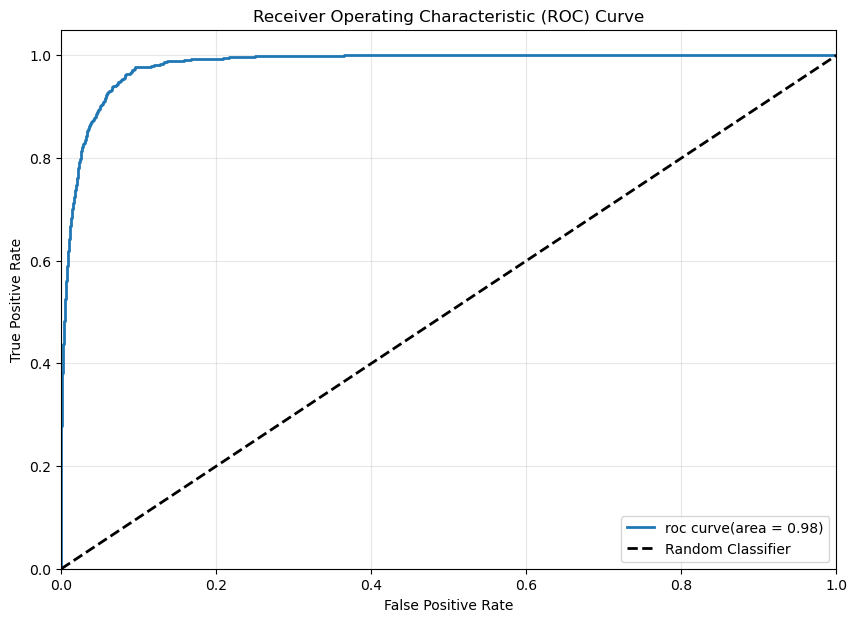

In [293]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, lw=2, label="roc curve(area = %0.2f)" % area)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Deploying Model

In [295]:
df_train_final.columns

Index(['sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'age', 'number_of_open_accounts',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'average_dpt_per_deliquant_month',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured', 'residence_type_Owned', 'residence_type_Rented'],
      dtype='object')

In [296]:
X_test_new.columns


Index(['sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'age', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'average_dpt_per_deliquant_month', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured',
       'residence_type_Owned', 'residence_type_Rented'],
      dtype='object')

In [300]:
from joblib import dump
model_data = {
    "model" : best_logistic_model,
    "features" : X_test_new.columns,
    "scaler" : scaler,
    "col_to_scale" : df_train_final.columns
}
dump(model_data , "artifacts/model_data4.joblib")

['artifacts/model_data4.joblib']